# Kombinované namáhání

Načtení potřebných knihoven,

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

Zavedení *LaTeX*ovského výpisu výsledků,

In [2]:
sp.init_printing(use_unicode=False)

### Zadání
Určete bezpečnost vzhledem k meznímu stavu pružnosti u prutu podle obrázku, viz. obrázek, je-li dáno,

\begin{eqnarray}
  \sigma_{k}&=&350\,\mathrm{MPa},\\
  F&=&10\,\mathrm{kN},\\
  R&=&300\,\mathrm{mm},\\
  d&=&50\,\mathrm{mm.}
\end{eqnarray}

![Obrázek](kombinovane_namahani_2.PNG)

Úloha je staticky určitá.

*Úkol*: Proveďte úplné uvolnění a statický rozbor.

Zavedení potřebných symbolů,

In [3]:
p,R,d=sp.symbols(r'\varphi R d')
F=sp.symbols('F')
y,z=sp.symbols('y z')

Protože je úloha staticky určitá, lze ihned vyjádřit jednoznačně *výsledné vnitřní účinky*,

\begin{eqnarray}
  T\left(\varphi\right)&=&F,\\
  M\left(\varphi\right)&=&-FR\sin\varphi,\\
  M_{k}\left(\varphi\right)&=&FR\left(1-\cos\varphi\right)
\end{eqnarray}

pro $\varphi\in\left[0,\pi\right]$. Zapsáno *Python*ovsky,

In [4]:
T=F
M=-F*R*sp.sin(p)
Mk=F*R*(1-sp.cos(p))
T,M,Mk

Namáhání prutu se vyšetří na základě výše uvedeného konkrétního zadání. Zadané hodnoty jsou v [mm], [N] a [MPa],

In [5]:
R_=300.
d_=50.
F_=10000.
sigma_k=350

Pro vykreslení vnitřních účinků se tyto vyjádří v bodech rovnoměrně rozložených podél střednice v závislosti na úhlu $\varphi$, 

In [6]:
phi_=np.linspace(0,np.pi,200)
plot_T=[float(T.subs(F,F_)) for ii in phi_]
plot_M=[float(M.subs({F:F_,R:R_,p:ii})) for ii in phi_]
plot_Mk=[float(Mk.subs({F:F_,R:R_,p:ii})) for ii in phi_]

Vykreslení posouvající složky $T\left(\varphi\right)$ podél střednice zakřiveného prutu,

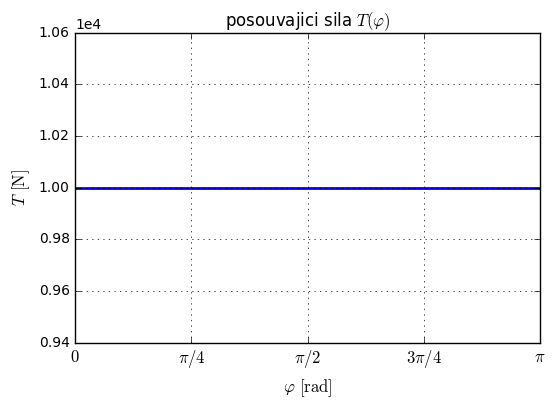

In [7]:
fig,ax=plt.subplots()
ax.set_title('posouvajici sila '+r'$T(\varphi)$').set_fontsize(12)
ax.set_xlabel(r'$\varphi$ '+r'$\mathrm{[rad]}$').set_fontsize(12)
ax.set_ylabel(r'$T$ '+r'$\mathrm{[N]}$').set_fontsize(12)
ax.set_xlim((0,np.pi))
ax.set_xticks((0,np.pi/4.,np.pi/2.,3*np.pi/4.,np.pi))
ax.set_xticklabels((r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'),fontsize=12)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(phi_,plot_T,lw=2)

Vykreslení složky ohybového momentu $M\left(\varphi\right)$ podél střednice zakřiveného prutu,

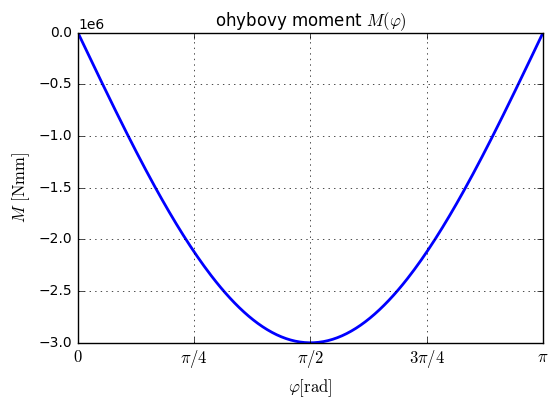

In [8]:
fig,ax=plt.subplots()
ax.set_title('ohybovy moment '+r'$M(\varphi)$').set_fontsize(12)
ax.set_xlabel(r'$\varphi$'+r'$\mathrm{[rad]}$').set_fontsize(12)
ax.set_ylabel(r'$M$ '+r'$\mathrm{[Nmm]}$').set_fontsize(12)
ax.set_xlim((0,np.pi))
ax.set_xticks((0,np.pi/4.,np.pi/2.,3*np.pi/4.,np.pi))
ax.set_xticklabels((r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'),fontsize=12)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(phi_,plot_M,lw=2)

Vykreslení složky kroutícího momentu $M_k\left(\varphi\right)$ podél střednice zakřiveného prutu,

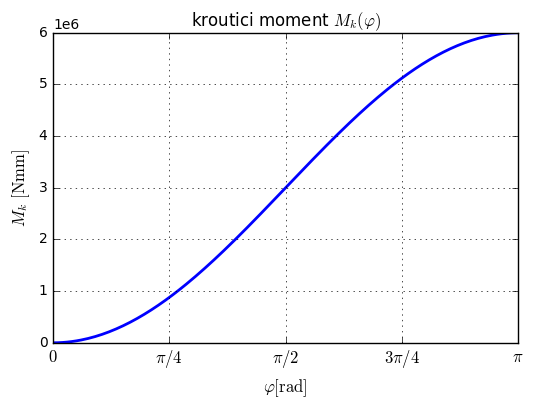

In [9]:
fig,ax=plt.subplots()
ax.set_title('kroutici moment '+r'$M_k(\varphi)$').set_fontsize(12)
ax.set_xlabel(r'$\varphi$'+r'$\mathrm{[rad]}$').set_fontsize(12)
ax.set_ylabel(r'$M_k$ '+r'$\mathrm{[Nmm]}$').set_fontsize(12)
ax.set_xlim((0,np.pi))
ax.set_xticks((0,np.pi/4.,np.pi/2.,3*np.pi/4.,np.pi))
ax.set_xticklabels((r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'),fontsize=12)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(phi_,plot_Mk,lw=2)

#### Kontrola k meznímu stavu pružnosti zakřiveného prutu (rámu)

Kromě volného konce prutu dochází všude podél střednice prutu ke kombinaci napětí. Kontrolu provedeme jen pro úhel $\varphi=\pi/2$. Dochází zde ke kombinaci smykových napětí od krutu a síly $\boldsymbol{F}$ a normálového napětí od ohybového momentu a smykového napětí od síly $\boldsymbol{F}$. Proto v příčném průřezu vyjáříme průběhy napětí podle vztahů,

\begin{eqnarray}
  &&\tau^T_{xz}=\frac{T}{12J}\left(d^2-4z^2\right)\quad\Leftarrow\quad\mathrm{tzv.}\,\mathrm{Žuravského}\,\mathrm{vztah}, \\
  &&\sigma^M_x=\frac{M}{J}z, \\
  &&\tau^{M_k}_{x\varphi}=\frac{M_k}{J_p}r,
\end{eqnarray}

kde $J=J_y=J_z=\pi d^4/64$ a $J_p=J_y+J_z=2J_y=2J_z=\pi d^4/32$ a $r^2=y^2+z^2$.

**Poznámka**: Aby byl graf napětí $\sigma_x^M$ názornější, je ve vztahu pro $\sigma_x^M$ znaménko mínus.

Zapsáno *Python*ovsky,

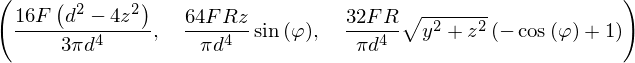

In [10]:
sT=16*T*(d**2-4*z**2)/3/sp.pi/d**4
sM=-64*M*z/sp.pi/d**4
sMk=32*Mk*sp.sqrt(y**2+z**2)/sp.pi/d**4
sT,sM,sMk

Pro vykreslení napětí v příčném pruřezu se tyto vyjádří v bodech sítě vygenerované ve tvaru příčného průřezu pro $\varphi=\pi/2$,

In [11]:
n_angles=36
n_radii=8
# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii=np.linspace(0,d_/2.,n_radii)
# An array of angles
angles=np.linspace(0,2*np.pi,n_angles,endpoint=False)
xp=[ii*np.cos(jj) for jj in angles for ii in radii]
yp=[ii*np.sin(jj) for jj in angles for ii in radii]
zT=[float(sT.subs({F:F_,d:d_,z:jj})) for jj in yp]
zM=[float(sM.subs({F:F_,d:d_,R:R_,p:np.pi/2.,z:jj})) for jj in yp]
zMk=[float(sMk.subs({F:F_,d:d_,R:R_,p:np.pi/2.,y:xp[jj],z:yp[jj]}))  \
     for jj in range(len(xp))]

Vykreslení napětí $\tau^{T}_{xz}\left(y,z\right)$,

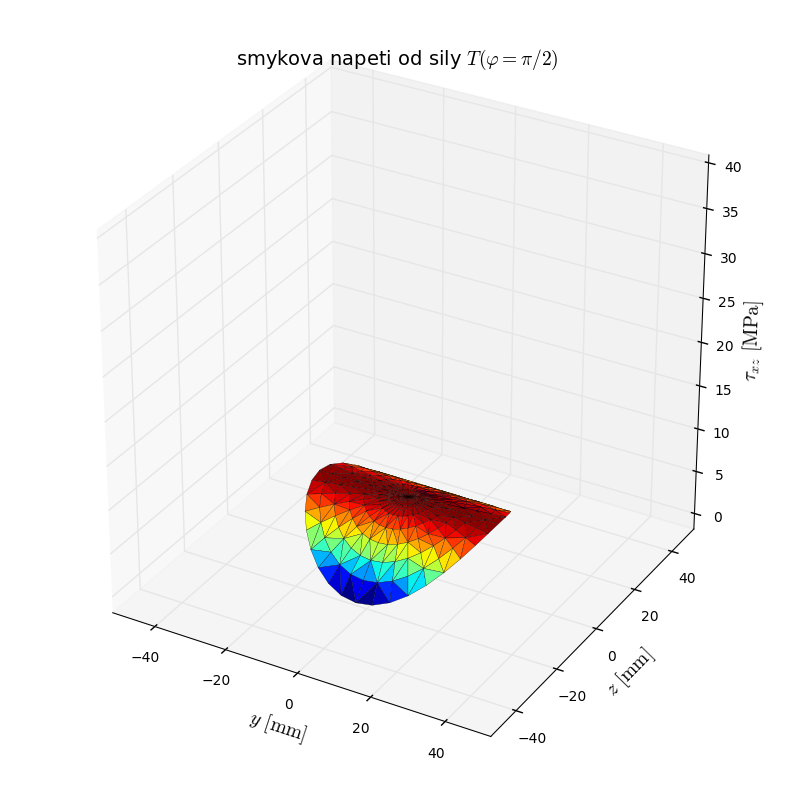

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('smykova napeti od sily '+r'$T(\varphi=\pi/2)$').set_fontsize(14)
ax.set_xlim(-d_,d_)
ax.set_ylim(-d_,d_)
ax.set_zlim(-1,40)
ax.set_xlabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(14)
ax.set_ylabel('$z$ '+r'$\mathrm{[mm]}$').set_fontsize(14)
ax.set_zlabel(r'$\tau_{xz}$ '+r'$\mathrm{[MPa]}$').set_fontsize(14)
ax.plot_trisurf(xp,yp,zT,cmap=cm.jet,linewidth=0.2)

Vykreslení napětí $\sigma^{M}_x\left(y,z\right)$,

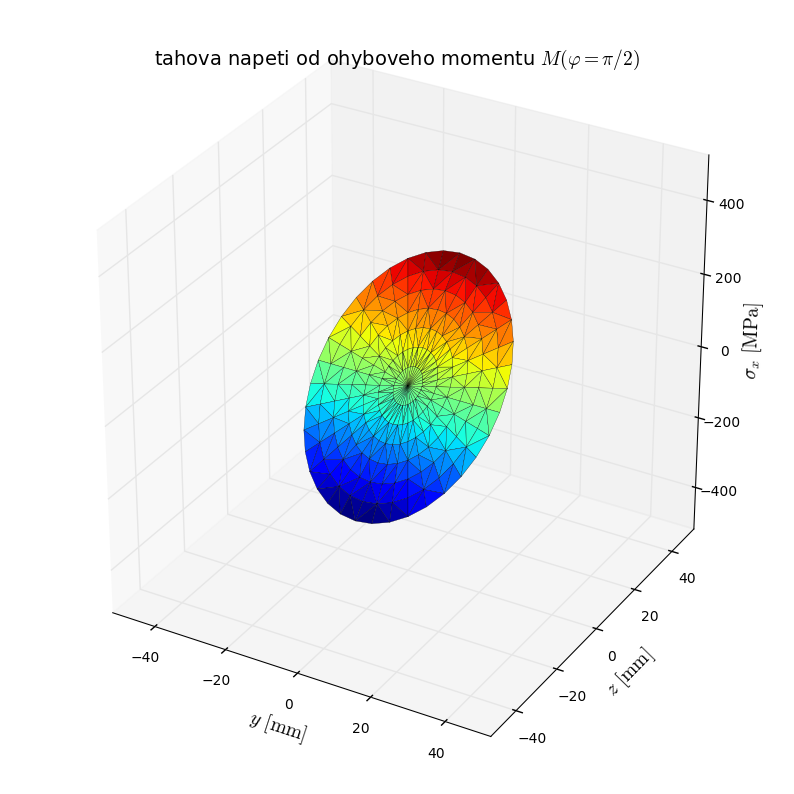

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('tahova napeti od ohyboveho momentu '+r'$M(\varphi=\pi/2)$') \
            .set_fontsize(14)
ax.set_xlim(-d_,d_)
ax.set_ylim(-d_,d_)
ax.set_zlim(-500,500)
ax.set_xlabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(14)
ax.set_ylabel('$z$ '+r'$\mathrm{[mm]}$').set_fontsize(14)
ax.set_zlabel(r'$\sigma_x$ '+r'$\mathrm{[MPa]}$').set_fontsize(14)
ax.plot_trisurf(xp,yp,zM,cmap=cm.jet,linewidth=0.2)

Vykreslení napětí $\tau^{M_k}_{x\varphi}\left(y,z\right)$,

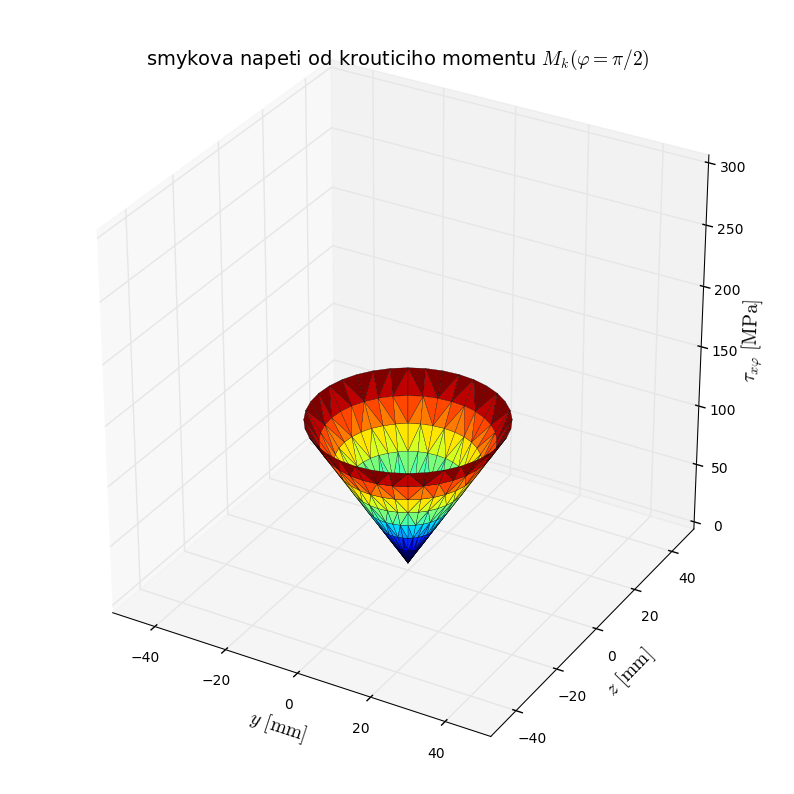

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('smykova napeti od krouticiho momentu '+r'$M_k(\varphi=\pi/2)$') \
            .set_fontsize(14)
ax.set_xlim(-d_,d_)
ax.set_ylim(-d_,d_)
ax.set_zlim(0,300)
ax.set_xlabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(14)
ax.set_ylabel('$z$ '+ r'$\mathrm{[mm]}$').set_fontsize(14)
ax.set_zlabel(r'$\tau_{x\varphi}$ '+r'$\mathrm{[MPa]}$').set_fontsize(14)
ax.plot_trisurf(xp,yp,zMk,cmap=cm.jet,linewidth=0.2)

Na střednici příčného průřezu, tj. pro $z=0$, ale $y=d/2$ je smykové napětí superozicí napětí od účinků $T$ a $M_{k}$,

$$
  \tau_{xz,max}=\frac{|4T\left(\frac{\pi}{2}\right)|}{3S}+\frac{|M_{k}\left(\frac{\pi}{2}\right)|}{W_{k}},
$$

kde

$$
  S=\frac{\pi d^{2}}{4}\quad\mathrm{a}\quad W_{k}=\frac{\pi d^{3}}{16}.
$$

V krajních vláknech prutu studovaného příčného průřezu, tj. pro $y=0$, ale $z=d/2$, je superozice normálového napětí od složky vnitřních účinků $M$ a smykového napětí od složky vnitřních účinků $M_{k}$. Redukované napětí se vyjádří podle Trescovy teorie,

$$
  \sigma_{red}=\sqrt{\left(\sigma_{x}^{M}\right)^{2}+4\left(\tau_{xy}^{M_{k}}\right)^{2}}=\sqrt{\left(\frac{M\left(\frac{\pi}{2}\right)}{W_{o}}\right)^{2}+4\left(\frac{M_{k}\left(\frac{\pi}{2}\right)}{W_{k}}\right)^{2}},
$$

kde

$$
  W_o=\frac{\pi d^4}{64}.
$$

Bezpečnost vzhledem k meznímu stavu pružosti zakřiveného prutu je potom,

$$
  k=\mathrm{min}\left\{ \frac{\sigma_{k}}{2\tau_{xz,max}},\frac{\sigma_{k}}{\sigma_{red}}\right\}.
$$

In [15]:
tau_max=float(abs(sT.subs({F:F_,d:d_,z:0.0}))) \
        +float(abs(sMk.subs({F:F_,d:d_,R:R_,p:np.pi/2.,y:d_/2,z:0.0})))
sigma_red=np.sqrt(float(sM.subs({F:F_,d:d_,R:R_,p:np.pi/2.,y:0.0,z:d_/2}))**2 \
             +4*(float(sMk.subs({F:F_,d:d_,R:R_,p:np.pi/2.,y:0.0,z:d_/2})))**2)
tau_max,sigma_red

In [16]:
k1=min([sigma_k/tau_max,sigma_k/sigma_red])
print 'bezpečost vzhledem k meznímu stavu pruznosti k={:9.2E}'.format(k1)

bezpečost vzhledem k meznímu stavu pruznosti k= 1.01E+00
